In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [15]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
validation = pd.read_csv("validation.csv")

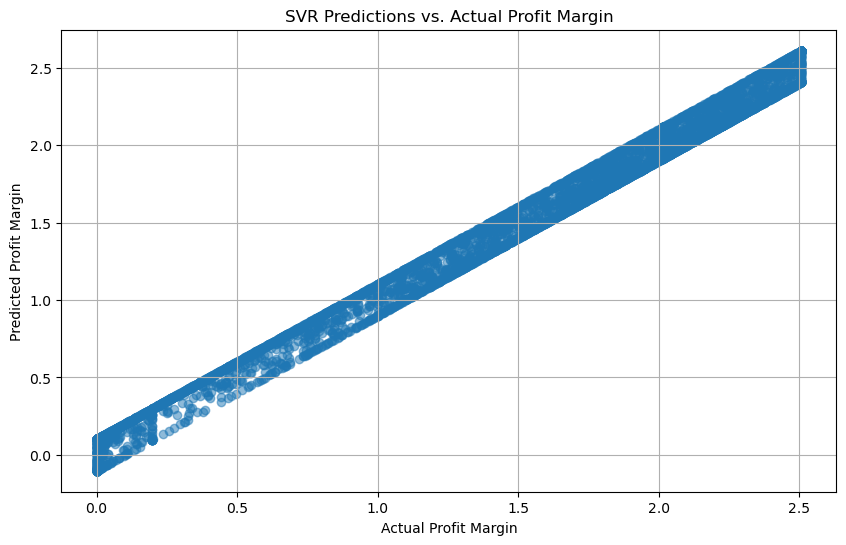

MSE: 0.007898904503196117
RMSE: 0.08887578130849887
MAE: 0.08414900035760607


In [29]:
X = train.drop(columns=['profit_margin'])
Y = train['profit_margin']

svr = SVR(kernel='rbf', C=1e5) #high C value reduce margin but may lead to overfitting. Small value is opposite, gamma is default

svr.fit(X, Y) #dark blue is model, light blue is actual

y_pred = svr.predict(X)

rmse = np.sqrt(mean_squared_error(Y, y_pred))
mae = mean_absolute_error(Y, y_pred)
mse = mean_squared_error(Y, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(Y, y_pred, alpha=0.5)
plt.xlabel("Actual Profit Margin")
plt.ylabel("Predicted Profit Margin")
plt.title("SVR Predictions vs. Actual Profit Margin")
plt.grid(True)
plt.show()

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')